In [9]:
##################################################################################################
# Patch-based Classification of Breast Cancer Histology Images using CNNs
# LE48: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
##################################################################################################
import numpy as np
import glob

print "Model type \t| Max train acc | Max val_acc | Last val_acc |  Train time |   #epochs \n--------------------------------------------------------------------------------"

for history_filename in sorted(glob.glob('./../History/history_SN_*_*_x00.txt')): # FOR THE BEST PATCHING METHOD
# for history_filename in sorted(glob.glob('./../History/history_RCNN*.txt')): # FOR THE BEST PATCHING METHOD

#     if history_filename == './../History/history_SN_512_256_x_FRA1_DR3_DR1.txt':
#         continue

#     if len(hist) < 2:
#         continue
    hist = np.loadtxt(history_filename, delimiter=',')
    
    MAX_N_EPOCHS = len(hist)
    MAX_N_EPOCHS = min(50, len(hist))
    
    model_type = history_filename.split('/')[-1][8:-4]
    
    print "{:}\t\t{:.3f} \t\t{:.3f}\t\t{:.3f}       {:.2f} min  \t{:02d}/{:02d}".format(
        model_type, np.max(hist[:MAX_N_EPOCHS,1]), np.max(hist[:MAX_N_EPOCHS,3]), hist[MAX_N_EPOCHS-1,3], np.mean(hist[:MAX_N_EPOCHS,4])/60., MAX_N_EPOCHS, len(hist))
    
#     print model_type,"\t\t\t", np.max(hist[:,3]), "\t\t", hist[-1,3]
    
'''
WITH RANDOM AUGMENTATION

SN_256_256_x00    org
SN_256_256_x10    dropout at dense
SN_256_256_x40    he init + droput 0.5 at dense, 0.1 after conv
SN_256_256_x50    he init + droput 0.5 at dense

SN_512_256_x00    org
SN_512_256_x10    dropout at dense
SN_512_256_x20    dropout at dense layers + after pooling layers => not good

SN_512_512_x00
SN_512_512_x10    dropout at dense
SN_512_512_x20    dropout at dense layers + after pooling layers => not good

SN_1024_256_x00
SN_1024_256_x10

SN_1024_512_x00

----------------------------------------------------------------------------

Compared various patching methods => 512_256 shows best results for this problem


Model type 	|    Max val_acc | Last val_acc |  Train time |   #epochs 
--------------------------------------------------------------------------------
SN_1024_256_x00		0.55		0.54       1.32 min  	20/20
SN_1024_512_x00		0.42		0.38       0.54 min  	14/14
SN_256_256_x00		0.57		0.56       2.66 min  	28/28
SN_512_256_x00		0.64		0.62       2.02 min  	53/53
SN_512_512_x00		0.56		0.51       1.11 min  	54/54

--------------------------------------------------------------------------
Taking best patching method, compare effects of recent suggestions to improvement of performance

Compare dropouts
SN_512_256_x          no dropout DONE
SN_512_256_x10        0.5 at dense DONE
SN_512_256_x_DR1      0.4 at dense DONE
SN_512_256_x_DR2      0.3 at dense DONE
SN_512_256_x_DR5      best from above + 0.1 after pool
SN_512_256_x_DR7      0.1 after pool only

Try batch norm
SN_512_256_x_BN1      batch norm everywhere DONE

HE init
SN_512_256_x_HE       all relu layers, not fixing seed

FIXED AUGMENTATION SET
SN_512_256_x_FA1

COMBINED FIXED AND RANDOM ............... better !!! if with dropout 0.5 => start from there

SN_512_256_x_FRA1         not better, SKIP

SN_512_256_x_FRA1_DR3     as above  + dropout at dense 0.5

SN_512_256_x_FRA1_DR3_BN    + add Bnorm also   BAD

SN_512_256_x_FRA1_DR3_DR2   + added dropout 0.2 after pool


SN_512_256_x_FRA1_DR3_DR1    + added dropout 0.1 after pool ???

alebo run 0.2 dropout after pools first ...VECER pusti


TRY CROSS-VAL WITH RANDOM AUGMENTATIONS


Conclusions:
1. best patching startegy

A: compared dropout/ ... no effects ...

B: tried combination of fixed and rand augment - > better
added dropout better (show before and after ... overfitting)
Then improve using BNORM


FFFFFINAL
try RCNN


'''
print ""

Model type 	| Max train acc | Max val_acc | Last val_acc |  Train time |   #epochs 
--------------------------------------------------------------------------------
SN_1024_256_x00		0.576 		0.553		0.542       1.32 min  	20/20
SN_1024_512_x00		0.336 		0.418		0.380       0.54 min  	14/14
SN_256_128_x00		0.872 		0.608		0.583       8.91 min  	24/24
SN_256_256_x00		0.723 		0.566		0.559       2.66 min  	28/28
SN_512_256_x00		0.798 		0.643		0.630       2.02 min  	50/53
SN_512_512_x00		0.621 		0.558		0.552       1.11 min  	50/54



Train max acc =  0.872242424281
Valid max acc =  0.608303030274 at 14
Mean training time per epoch = 8.90737563504 min


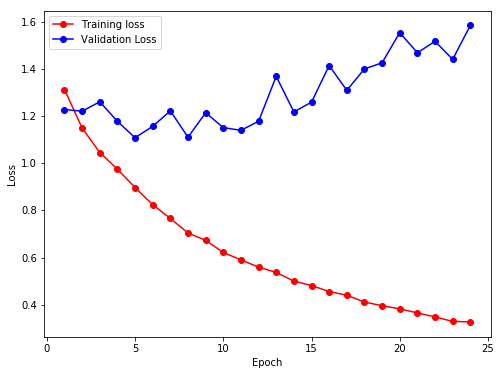

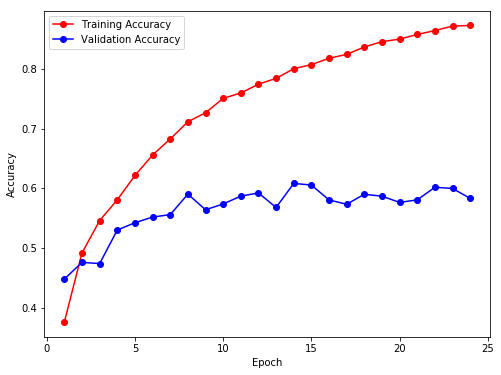

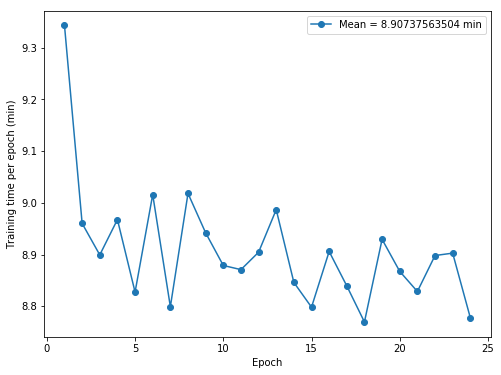

[ 0.44854545  0.47642424  0.47436364  0.53048485  0.54260606  0.55212121
  0.55612121  0.59042424  0.56430303  0.574       0.58715152  0.59236364
  0.56818182  0.60830303  0.60563636  0.58072727  0.57351515  0.59018182
  0.5870303   0.57660606  0.58084848  0.60187879  0.59993939  0.58327273]


In [8]:
##############################################################################
# Plot history
# Plot training and validation loss and accuracy curves
# Plot training times per epoch
# http://cs231n.github.io/neural-networks-3/
# The gap between the training and validation accuracy indicates the amount of overfitting.
# increase regularization (stronger L2 weight penalty, more dropout, etc.) or collect more data
# other possible case is when the validation accuracy tracks the training accuracy fairly well. 
# This case indicates that your model capacity is not high enough: 
# make the model larger by increasing the number of parameters.
##############################################################################
# Most uptodate
##############################################################################
from matplotlib import pyplot as plt
import numpy as np

# Load history
# model_type = 'SN_512_256_8_00'
# model_type = 'SN_512_256_8_10'
# model_type = 'SN_512_256_8_11' # bad
# model_type = 'SN_512_256_8_12' # same as above
# model_type = 'SN_512_512_8_00'
model_type = 'SN_512_256_x00' # org arch
model_type = 'SN_512_256_x10' # dropout at dense layers => can be better
# model_type = 'SN_512_256_x20' # dropout at dense layers + after pooling layers => not good

# type x30 dropout at last layers + he_init
# from what you see add BNorm to type x30 

# model_type = 'SN_512_512_x00'

# model_type = 'SN_512_256_x00'
# model_type = 'SN_256_256_x00'
model_type = 'SN_512_256_x_DR1'

model_type = 'SN_512_256_x_BN1'


model_type = 'SN_512_256_x_FA1'
# model_type = 'SN_512_256_x_FRA1'

# model_type = 'SN_512_256_x00'

model_type = 'SN_512_256_x_FRA1_DR3'
# model_type = 'SN_512_256_x_FRA1_DR3_BN'
model_type = 'SN_512_256_x_FRA1_DR3_DR2'


model_type = 'SN_512_256_xxx'

######################################## checking
model_type = 'SN_512_256_x00'     # best at 43     0.643    SN_512_256_x00_w-43-0.58-0.77-1.04-0.64 no
model_type = 'SN_512_256_xxx'     # best at 50     0.6628   SN_512_256_xxx_w-50-0.54-0.79-1.04-0.66
model_type = 'SN_1024_256_xxx'    # best at 57     0.676


model_type = 'RCNN_256_256_00'
# model_type = 'RCNN_256_256_01'
# model_type = 'RCNN_256_256_02'

model_type = 'SN_256_128_x00'


history_filename = './../History/history_' + model_type + '.txt'

hist = np.loadtxt(history_filename, delimiter=',')
# hist = hist[:20]
model_hist = lambda: None
model_hist.train_loss = hist[:,0]
model_hist.train_acc = hist[:,1]
model_hist.val_loss = hist[:,2]
model_hist.val_acc = hist[:,3]
model_hist.times = hist[:,4]
x = range(1, len(model_hist.times)+1)
print "Train max acc = ",np.max(model_hist.train_acc)
print "Valid max acc = ",np.max(model_hist.val_acc), "at", np.argmax(model_hist.val_acc)+1
print 'Mean training time per epoch = '+str(np.mean(model_hist.times)/60.)+" min"

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(x, model_hist.train_loss,'ro-')#,linewidth=2.0)
plt.plot(x, model_hist.val_loss,'bo-')#,linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Loss')#,fontsize=16)
# plt.ylim(0.35, 0.95)
# plt.title('Loss Curves',fontsize=16)
plt.show()
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(x, model_hist.train_acc,'ro-')#,linewidth=2.0)
plt.plot(x, model_hist.val_acc,'bo-')#,linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])#,fontsize=18)
# plt.xticks(x, x)
plt.xlabel('Epoch')#,fontsize=16)
plt.ylabel('Accuracy')#,fontsize=16)
# plt.title('Accuracy Curves',fontsize=16)
# plt.ylim(0.35, 0.95)
plt.show()

# Training time
plt.figure(figsize=[8,6])
plt.plot(x, np.array(model_hist.times)/60., 'o-')
# plt.xticks(x, x)
plt.xlabel('Epoch')
plt.ylabel('Training time per epoch (min)')
plt.legend(['Mean = '+str(np.mean(model_hist.times)/60.)+" min"])
plt.show()

print model_hist.val_acc[:57]

In [8]:
##############################################################################
# Get average validation acc over 10 random restarts
##############################################################################

model_type = 'SN_512_256_x1'
N_restarts = 10

max_val_accs = []

for i in range(N_restarts):
    
    hist = np.loadtxt('./../History/history_' + model_type + str(i) + '.txt', delimiter=',')
    
    max_val_accs.append( np.max(hist[:,3]) )
    
print max_val_accs
print np.mean(max_val_accs), "+/-", np.std(max_val_accs)

IOError: [Errno 2] No such file or directory: './../History/history_SN_512_256_x12.txt'